<a href="https://colab.research.google.com/github/lresendao/Data_Science/blob/main/Tratamento_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [ ]:
#importar dados
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Udemy/Prática em Python - Limpeza e Tratamento de Dados/tempo.csv", sep=";")
#visualizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [ ]:
#tamanho
dataset.shape

(14, 5)

In [ ]:
#visualizar
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [ ]:
#explorar dados categóricos
#estado
agrupado_Aparencia = dataset.groupby(["Aparencia"]).size()

agrupado_Aparencia

,0
Aparencia,
chuva,5
menos,1
nublado,3
sol,5


<Axes: xlabel='Aparencia'>

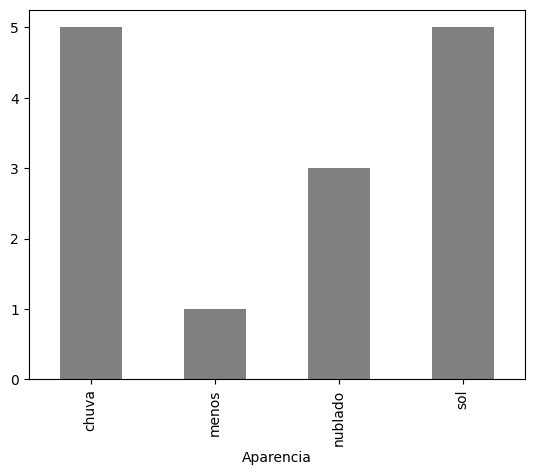

In [ ]:
agrupado_Aparencia.plot.bar(color = 'gray')

In [ ]:
#contamos valores NAN
#genero e salario
dataset.isnull().sum()

,0
Aparencia,0
Temperatura,0
Umidade,1
Vento,1
Jogar,0


In [ ]:
#salarios
#remover NAs e substituir pela mediana
dataset["Aparencia"].describe()

,Aparencia
count,14
unique,4
top,sol
freq,5


In [ ]:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [ ]:
#substiuir NAs pela moda
moda_Aparencia = sts.mode(dataset["Aparencia"])
moda_Aparencia

'sol'

In [ ]:
#preenche NAs com masculino (moda)
dataset.fillna({"Aparencia": moda_Aparencia}, inplace=True)

In [ ]:
dataset['Aparencia'].isnull().sum()

0

In [ ]:
#padroniza de acordo com o dominio
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = moda_Aparencia
#visualiza o resultado
agrupado_Aparencia = dataset.groupby(["Aparencia"]).size()
agrupado_Aparencia

,0
Aparencia,
chuva,5
nublado,3
sol,6


In [ ]:
#explorar dados categóricos
#estado
agrupado_Temperatura = dataset.groupby(["Temperatura"]).size()

agrupado_Temperatura

,0
Temperatura,
64,1
65,1
68,1
69,1
70,1
71,1
72,1
75,2
80,1


Text(0.5, 1.0, 'Temperatura')

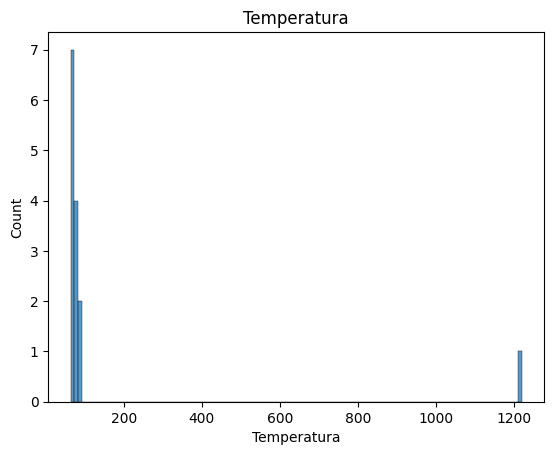

In [ ]:
srn.histplot(dataset['Temperatura']).set_title('Temperatura')

In [ ]:
mediana_Temperatura = sts.median(dataset["Temperatura"])
mediana_Temperatura

73.5

In [ ]:
#visualizar
dataset.loc[(dataset['Temperatura'] < -130.0) | (dataset['Temperatura'] > 130.0)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [ ]:
#substituir
dataset.loc[(dataset['Temperatura'] < -130.0) | (dataset['Temperatura'] > 130.0), 'Temperatura'] = mediana_Temperatura

In [ ]:
float(mediana_Temperatura)

73.5

In [ ]:
pip install dtype_diet

In [ ]:
import dtype_diet as dd

In [ ]:
dd.report_on_dataframe(dataset)

,Current dtype,Proposed dtype,Current Memory (MB),Proposed Memory (MB),Ram Usage Improvement (MB),Ram Usage Improvement (%)
Column,,,,,,
Aparencia,object,category,0.485352,0.214844,0.270508,55.734406
Temperatura,float64,float16,0.119141,0.078125,0.041016,34.426230
Umidade,float64,float16,0.119141,0.078125,0.041016,34.426230
Vento,object,category,0.488281,0.187012,0.301270,61.700000
Jogar,object,category,0.474609,0.182617,0.291992,61.522634


Text(0.5, 1.0, 'Temperatura')

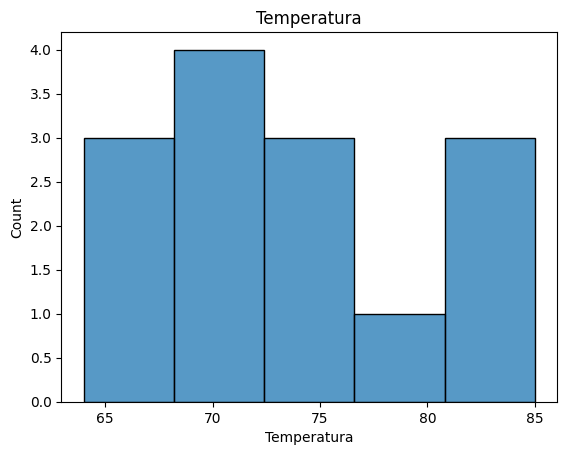

In [ ]:
srn.histplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

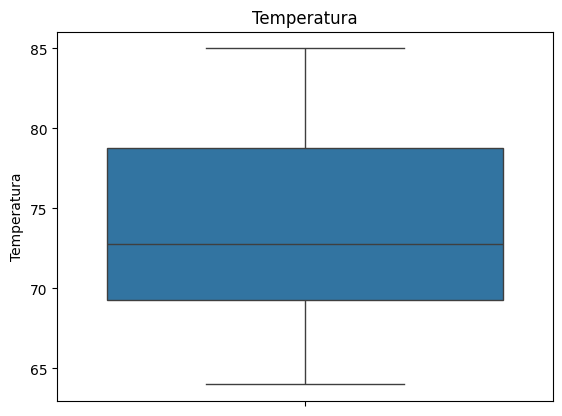

In [ ]:
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

<Axes: xlabel='Temperatura'>

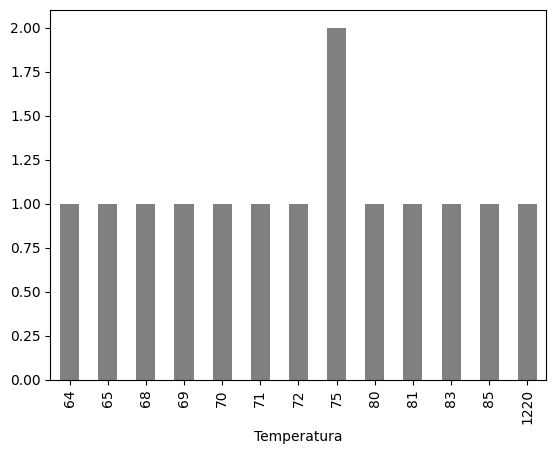

In [ ]:
agrupado_Temperatura.plot.bar(color = 'gray')

In [ ]:
agrupado_Temperatura

,0
Temperatura,
64,1
65,1
68,1
69,1
70,1
71,1
72,1
75,2
80,1


In [ ]:
mediana_Temperatura

73.5

In [ ]:
#substituir
dataset.loc[(dataset['Temperatura'] < -130.0) | (dataset['Temperatura'] > 130.0), 'Temperatura'] = mediana_Temperatura

In [ ]:
agrupado_Temperatura

,0
Temperatura,
64,1
65,1
68,1
69,1
70,1
71,1
72,1
75,2
80,1


In [ ]:
#explorar dados categóricos
#estado
agrupado_Temperatura = dataset.groupby(["Temperatura"]).size()

agrupado_Temperatura

,0
Temperatura,
64.0,1
65.0,1
68.0,1
69.0,1
70.0,1
71.0,1
72.0,1
73.5,1
75.0,2


In [ ]:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,NaN,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,200.0,NaN,sim


In [ ]:
#visualizar
dataset.loc[(dataset['Umidade'] < 0.0) | (dataset['Umidade'] > 100.0)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [ ]:
mediana_Umidade = sts.median(dataset["Umidade"])
mediana_Umidade

85.5

In [ ]:
#substituir
dataset.loc[(dataset['Umidade'] < 0.0) | (dataset['Umidade'] > 100.0), 'Umidade'] = mediana_Umidade

In [ ]:
dataset['Umidade']

,Umidade
0,85.0
1,90.0
2,86.0
3,NaN
4,80.0
5,70.0
6,65.0
7,95.0
8,70.0
9,85.5


In [ ]:
#substituir NAN por mediana
dataset.fillna({"Umidade": mediana_Umidade}, inplace=True)

In [ ]:
dataset['Umidade']

,Umidade
0,85.0
1,90.0
2,86.0
3,85.5
4,80.0
5,70.0
6,65.0
7,95.0
8,70.0
9,85.5


Text(0.5, 1.0, 'Umidade')

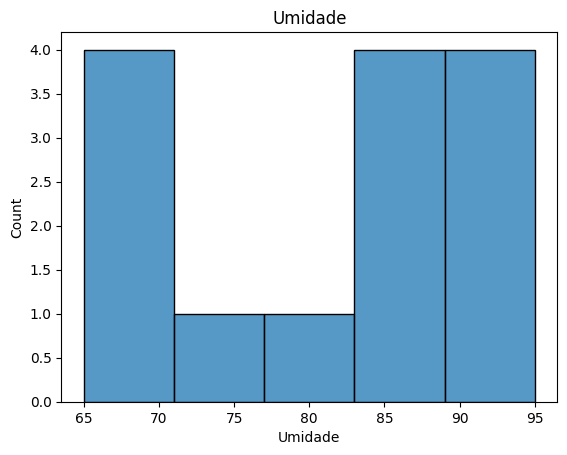

In [ ]:
srn.histplot(dataset['Umidade']).set_title('Umidade')

In [ ]:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,NaN,sim


In [ ]:
dataset['Vento'].describe()

,Vento
count,13
unique,2
top,FALSO
freq,7


In [ ]:
dataset['Vento'].isnull().sum()

1

In [ ]:
moda_Vento = sts.mode(dataset["Vento"])
moda_Vento

'FALSO'

In [ ]:
#substituir NAN por mediana
dataset.fillna({"Vento": moda_Vento}, inplace=True)

In [ ]:
dataset

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim


In [ ]:
dataset['Jogar'].describe()

,Jogar
count,14
unique,2
top,sim
freq,9


In [ ]:
#explorar dados categóricos
#estado
agrupado_Jogar = dataset.groupby(["Jogar"]).size()

agrupado_Jogar

,0
Jogar,
nao,5
sim,9


In [ ]:
dataset2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Udemy/Prática em Python - Limpeza e Tratamento de Dados/tempo.csv", sep=";")

In [ ]:
proposed_df = dd.report_on_dataframe(dataset, unit="MB")
proposed_df

,Current dtype,Proposed dtype,Current Memory (MB),Proposed Memory (MB),Ram Usage Improvement (MB),Ram Usage Improvement (%)
Column,,,,,,
Aparencia,object,category,0.485352,0.214844,0.270508,55.734406
Temperatura,float64,float16,0.119141,0.078125,0.041016,34.426230
Umidade,float64,float16,0.119141,0.078125,0.041016,34.426230
Vento,object,category,0.502930,0.187012,0.315918,62.815534
Jogar,object,category,0.474609,0.182617,0.291992,61.522634


In [ ]:
dd.optimize_dtypes(dataset, proposed_df)

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,sol,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim


In [ ]:
proposed_df

,Current dtype,Proposed dtype,Current Memory (MB),Proposed Memory (MB),Ram Usage Improvement (MB),Ram Usage Improvement (%)
Column,,,,,,
Aparencia,object,category,0.485352,0.214844,0.270508,55.734406
Temperatura,float64,float16,0.119141,0.078125,0.041016,34.426230
Umidade,float64,float16,0.119141,0.078125,0.041016,34.426230
Vento,object,category,0.502930,0.187012,0.315918,62.815534
Jogar,object,category,0.474609,0.182617,0.291992,61.522634
